In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

In [2]:
df = pd.read_csv("s3://david-credit-221001/datos/original/david_credit_data.csv",  index_col=0)

In [3]:
df['Risk'].value_counts()/df['Risk'].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [4]:
train, test = train_test_split(df, test_size=0.3, 
                               random_state=42,
                              stratify=df['Risk'])

In [5]:
test['Risk'].value_counts()/test['Risk'].count()

good    0.7
bad     0.3
Name: Risk, dtype: float64

In [6]:
train.to_csv("s3://david-credit-221001/datos/train/train.csv", index=False)

In [7]:
test.to_csv("s3://david-credit-221001/datos/test/test.csv", index=False)

In [8]:
train.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
328,31,male,2,own,little,rich,4473,36,radio/TV,good
891,46,male,2,own,little,NaN,1829,15,radio/TV,good
255,27,male,1,own,NaN,moderate,7418,60,radio/TV,good
243,27,female,2,own,little,NaN,1185,12,business,good
492,27,female,2,own,moderate,NaN,1237,6,radio/TV,good


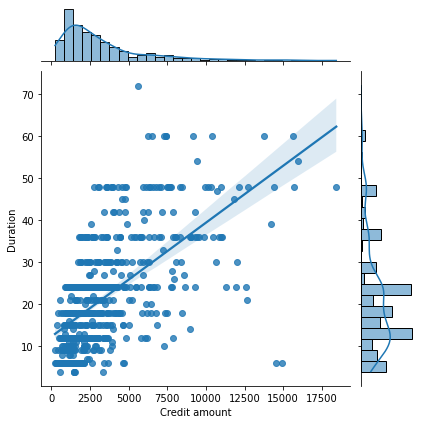

In [10]:
sns.jointplot(x = "Credit amount", y = "Duration", data = train,kind='reg')

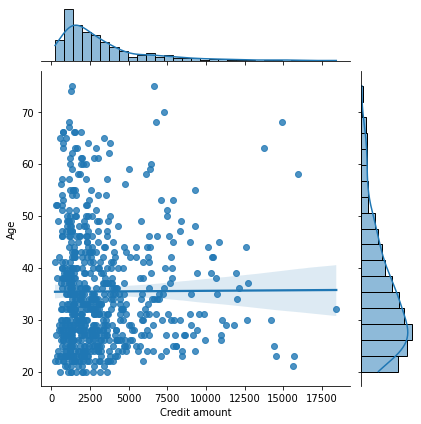

In [11]:
sns.jointplot(x = "Credit amount", y = "Age", data = train,kind='reg')

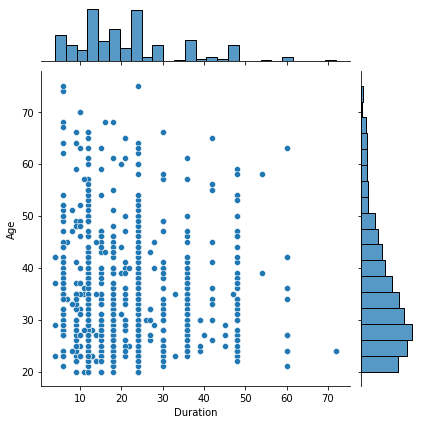

In [12]:
sns.jointplot(x = "Duration", y = "Age", data = train)

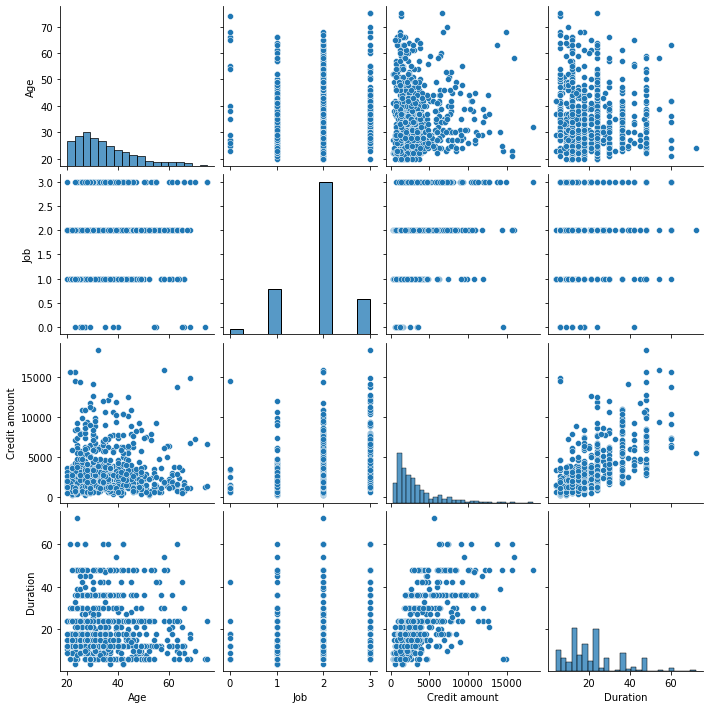

In [13]:
sns.pairplot(train)

In [14]:
table_sex =pd.crosstab(index=train['Sex'], columns=train['Risk'], margins= True)

In [15]:
table_sex['prob'] = table_sex.iloc[:,1]/table_sex.iloc[:,2]
table_sex

Risk,bad,good,All,prob
Sex,,,,
female,76,138,214,0.64486
male,134,352,486,0.72428
All,210,490,700,0.70000


In [16]:
table_housing =pd.crosstab(index=train['Housing'], columns=train['Risk'], margins= True)
table_housing['prob'] = table_housing.iloc[:,1]/table_housing.iloc[:,2]
table_housing

Risk,bad,good,All,prob
Housing,,,,
free,29,45,74,0.608108
own,133,371,504,0.736111
rent,48,74,122,0.606557
All,210,490,700,0.700000


In [17]:
table_age =pd.crosstab(index=train['Age'], columns=train['Risk'], margins= True)
table_age['prob'] = table_age.iloc[:,1]/table_age.iloc[:,2]
#table_age

# Preprocesamiento

In [18]:
#Formas de imputación

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
X_train = train[['Age', 'Credit amount', 'Duration']]

In [21]:
imputer = SimpleImputer(strategy='mean')

In [22]:
imputer.fit(X_train)

SimpleImputer()

In [23]:
imputer.statistics_

array([  35.40285714, 3236.12142857,   21.04857143])

In [24]:
imputer.transform([[24,1000,np.nan],
                 [np.nan,np.nan,12]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[  24.        , 1000.        ,   21.04857143],
       [  35.40285714, 3236.12142857,   12.        ]])

In [25]:
imputer.fit_transform(X_train)

array([[3.100e+01, 4.473e+03, 3.600e+01],
       [4.600e+01, 1.829e+03, 1.500e+01],
       [2.700e+01, 7.418e+03, 6.000e+01],
       ...,
       [6.300e+01, 1.655e+03, 1.200e+01],
       [4.900e+01, 2.096e+03, 1.200e+01],
       [3.700e+01, 3.676e+03, 6.000e+00]])

In [26]:
from sklearn.impute import KNNImputer

In [27]:
imputer = KNNImputer(n_neighbors=2)

In [28]:
d = {'peso': [40, 42,44,45,39,80,82], 'edad': [19,20,21,23,25,27,30], 'nota':[3.0,3.1,None,4.1,5.0,None,4.8]}
dfs = pd.DataFrame(data=d)
dfs

,peso,edad,nota
0,40,19,3.0
1,42,20,3.1
2,44,21,NaN
3,45,23,4.1
4,39,25,5.0
5,80,27,NaN
6,82,30,4.8


In [29]:
result = imputer.fit_transform(dfs)
result

array([[40.  , 19.  ,  3.  ],
       [42.  , 20.  ,  3.1 ],
       [44.  , 21.  ,  3.6 ],
       [45.  , 23.  ,  4.1 ],
       [39.  , 25.  ,  5.  ],
       [80.  , 27.  ,  4.45],
       [82.  , 30.  ,  4.8 ]])

In [74]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X_train[['Age']])

StandardScaler()

In [33]:
scaler.mean_

array([35.40285714])

In [34]:
scaler.var_**0.5

array([11.23479253])

In [35]:
#scaler.transform(X_train[['Age']])

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
train[["Sex"]]

,Sex
328,male
891,male
255,male
243,female
492,female
...,...
73,female
401,male
769,male
2,male


In [62]:
encoder = OneHotEncoder(sparse=False, drop='first')
encoder.fit_transform(train[["Sex"]])

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [63]:
encoder.categories_

[array(['female', 'male'], dtype=object)]

In [64]:
encoder.inverse_transform([[0]])

array([['female']], dtype=object)

In [72]:
from sklearn.pipeline import Pipeline

In [75]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media',   SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
        
    ]
)

In [77]:
numeric_pipeline.fit(train[['Age', 'Credit amount', 'Duration']])

Pipeline(steps=[('Imputación con la media', SimpleImputer()),
                ('Escalado minmax', MinMaxScaler())])

In [79]:
numeric_pipeline[0].statistics_

array([  35.40285714, 3236.12142857,   21.04857143])

In [82]:
numeric_pipeline[1].min_

array([-0.36363636, -0.01375592, -0.05882353])

In [83]:
numeric_pipeline[1].data_max_

array([   75., 18424.,    72.])

In [85]:
train[["Age", "Credit amount", "Duration"]].max()

Age                 75
Credit amount    18424
Duration            72
dtype: int64

In [87]:
numeric_pipeline.transform([[np.nan, np.nan, np.nan]])

/home/ec2-user/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([[0.28005195, 0.16430733, 0.25071429]])

In [ ]:
#Pipeline categorico

In [88]:
categorical_pipeline = Pipeline(
        [
            ('imputación moda', SimpleImputer(strategy='most_frequent')),
            ('onehot encoder', OneHotEncoder(sparse=False))
        ]

)

In [89]:
categorical_pipeline.fit(train[['Sex','Purpose', 'Housing']])

Pipeline(steps=[('imputación moda', SimpleImputer(strategy='most_frequent')),
                ('onehot encoder', OneHotEncoder(sparse=False))])

In [90]:
categorical_pipeline.transform(train[['Sex','Purpose', 'Housing']])

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [91]:
from sklearn.compose import ColumnTransformer

In [92]:
column_transformer = ColumnTransformer(
    [
        ('numeric pipeline', numeric_pipeline,[0,1,2]),
        ('categorical pipeline', categorical_pipeline,[3,4,5])
    ]
)

In [95]:
column_transformer.fit(train[["Age", 
                             "Credit amount",
                              "Duration",
                              "Sex",
                              "Purpose",
                              "Housing"]])

ColumnTransformer(transformers=[('numeric pipeline',
                                 Pipeline(steps=[('Imputación con la media',
                                                  SimpleImputer()),
                                                 ('Escalado minmax',
                                                  MinMaxScaler())]),
                                 [0, 1, 2]),
                                ('categorical pipeline',
                                 Pipeline(steps=[('imputación moda',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot encoder',
                                                  OneHotEncoder(sparse=False))]),
                                 [3, 4, 5])])

In [96]:
column_transformer.transform(train[["Age", 
                             "Credit amount",
                              "Duration",
                              "Sex",
                              "Purpose",
                              "Housing"]])

array([[0.2       , 0.23236492, 0.47058824, ..., 0.        , 1.        ,
        0.        ],
       [0.47272727, 0.08688236, 0.16176471, ..., 0.        , 1.        ,
        0.        ],
       [0.12727273, 0.3944096 , 0.82352941, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.78181818, 0.07730824, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.52727273, 0.10157368, 0.11764706, ..., 0.        , 1.        ,
        0.        ],
       [0.30909091, 0.18851106, 0.02941176, ..., 0.        , 0.        ,
        1.        ]])

In [100]:
joblib.dump(column_transformer, 'preprocessing.joblib')

['preprocessing.joblib']

# Evaluación de modelos con Val Cruzada

In [ ]:
### versión 01, evaluar solo el modelo

In [102]:
X_train = train[['Age',
                 'Duration',
                             'Credit amount',
                             'Sex',
                             'Purpose',
                             'Housing']]

In [103]:
y_train = train['Risk']

In [104]:
X_train_processed = column_transformer.transform(X_train)

In [105]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

In [110]:
y_train_transform = (y_train=='good').astype('int')

In [112]:
results = cross_validate(DecisionTreeClassifier(),
                        X_train_processed, y_train_transform, cv=10,
                        scoring=['accuracy', 'f1'])

In [115]:
print(results['test_accuracy'].mean(),'+-', results['test_accuracy'].std())

0.6242857142857142 +- 0.049507781289038454


# Versión 02 --> Evaluar el preprocesamiento incluyendolo en el pipline

In [114]:
final_pipeline = Pipeline(
    [
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)', DecisionTreeClassifier())
    ]
)

In [116]:
results = cross_validate(final_pipeline,
                        X_train_processed, y_train_transform, cv=10,
                        scoring=['accuracy', 'f1'])

In [118]:
print(results['test_accuracy'].mean(),'+-', results['test_accuracy'].std())

0.6285714285714286 +- 0.05268311118453076


# Versión 03 --> Agregar altura al arbol

In [131]:
final_pipeline = Pipeline(
    [
        ('Pipeline de preprocesamiento', column_transformer),
        ('Modelo de predicción(árbol)', DecisionTreeClassifier(max_depth=10))
    ]
)

results = cross_validate(final_pipeline,
                        X_train_processed, y_train_transform, cv=10,
                        scoring=['accuracy', 'f1'])

In [130]:
print(results['test_accuracy'].mean(),'+-', results['test_accuracy'].std())

0.6299999999999999 +- 0.04714285714285714


In [133]:
from sklearn.model_selection import GridSearchCV

In [135]:
grid = {'max_depth': [2,3,5,10]}

In [141]:
grid_search = GridSearchCV(
DecisionTreeClassifier(),
param_grid=grid,
cv = 10,
scoring = 'accuracy'
)

In [143]:
grid_search.fit(X_train_processed, y_train_transform)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10]}, scoring='accuracy')

In [146]:
grid_search.best_params_

{'max_depth': 3}

In [147]:
grid_search.best_score_

0.7214285714285713